In [99]:
import numpy as np
import matplotlib.pyplot as plt
import gender_guesser.detector as gender
import pandas as pd
import math
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [100]:
g_users = pd.read_csv("data/users.csv")
f_users = pd.read_csv("data/fusers.csv")
g_users.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,...,FFF7CC,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2015-02-14 10:54:49,E13
1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2015-02-14 10:54:49,E13
2,5682702,tacone,tacone_,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,...,000000,http://a0.twimg.com/profile_background_images/...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2015-02-14 10:54:49,E13
3,6067292,alesaura,alesstar,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,...,95E8EC,http://a0.twimg.com/images/themes/theme4/bg.gif,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2015-02-14 10:54:49,E13
4,6015122,Angelo,PerDiletto,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,...,F6F6F6,http://a0.twimg.com/images/themes/theme18/bg.gif,ACDED6,038543,3600.0,NaN,NaN,Je me souviens,2015-02-14 10:54:49,E13


In [101]:
data=pd.concat([f_users,g_users],ignore_index=True)

In [102]:
data_object=data.select_dtypes(include=['object'])
data['dataset']=data.dataset.map({'INT':0,'E13':1})

### Data Preprocessing

In [103]:
data[data.duplicated()]   #checking for duplicated values

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset


### forward fill-will fill with the current row values if the next row have null value
### backward fill - will fill with the current row values if the previous row have null value

In [104]:
data.time_zone=data.time_zone.fillna(method='ffill')
data.time_zone=data.time_zone.fillna(method='bfill')
data.utc_offset=data.utc_offset.fillna(method='ffill')
data.utc_offset=data.utc_offset.fillna(method='bfill')
data.description=data.description.fillna(method='ffill')
data.description=data.description.fillna(method='bfill')
data.location=data.location.fillna(method='ffill')
data.location=data.location.fillna(method='bfill')

In [105]:
data.profile_use_background_image=data.profile_use_background_image.fillna(0)
data.profile_background_tile=data.profile_background_tile.fillna(0)
data.geo_enabled=data.geo_enabled.fillna(0)
data.default_profile_image=data.default_profile_image.fillna(0)
data.default_profile=data.default_profile.fillna(0)

### Function to convert color code into RGB format

In [106]:
def hex_to_rgb(value):
    lv = len(value)
    return tuple(int(value[i:i+lv//3], 16) for i in range(0, lv, lv//3))

In [107]:
color_columns=['profile_text_color','profile_sidebar_border_color','profile_sidebar_fill_color','profile_background_color',
               'profile_link_color']
for i in color_columns:
    data[i]=data[i].apply(hex_to_rgb)

## Forming new columns that contains the R,G,B value of each of the 5 columns in 'color_columns', Thus forming 15 new columns...

In [108]:
abcde=pd.DataFrame()
for i in color_columns:
    abcdef=pd.DataFrame(data[i].tolist(), columns=[str(i)+'_red',str(i)+'_green',str(i)+'_blue'])
    abcde=pd.concat([abcdef,abcde],axis=1)
    

### concating new columns with the original dataframe

In [109]:
data=pd.concat([data,abcde],axis=1)
data.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_background_color_blue,profile_sidebar_fill_color_red,profile_sidebar_fill_color_green,profile_sidebar_fill_color_blue,profile_sidebar_border_color_red,profile_sidebar_border_color_green,profile_sidebar_border_color_blue,profile_text_color_red,profile_text_color_green,profile_text_color_blue
0,370098498,pirfectmoses,pirfectmoses,24,4,588,16,0,Thu Sep 08 13:20:35 +0000 2011,NaN,...,238,221,238,246,255,255,255,51,51,51
1,37384589,SAK Nair,bsknair1967,656,57,693,597,0,Sun May 03 07:35:13 +0000 2009,NaN,...,237,221,238,246,192,222,237,51,51,51
2,72110028,Deepak,dedjven,1234,15,104,1150,0,Sun Sep 06 19:50:08 +0000 2009,NaN,...,22,239,239,239,238,238,238,51,51,51
3,82885728,Marcos Vinicius,BrowAlves,573,14,227,530,0,Fri Oct 16 14:02:48 +0000 2009,NaN,...,237,221,238,246,192,222,237,31,29,31
4,110120789,Shri Kant Kanaujia,kanaujiask,675,18,519,653,0,Sun Jan 31 12:08:41 +0000 2010,NaN,...,237,221,238,246,192,222,237,51,51,51


### dropping previous columns in 'color_columns' because it's no longer in use

In [110]:
data=data.drop(color_columns,axis=1)
data.shape

(2818, 44)

### Since the data is nominal, we cannot use Label Encoder
### Thus we'll use get_dummies under pandas package

In [111]:
dummy_features=['lang','time_zone']
for i in dummy_features:
    xyz=pd.get_dummies(data[i])
    data=pd.concat([data,xyz],axis=1)

### Here we'll use Label Encoder in utc_offset coolumn because it is an ordinal data

In [112]:
lbl=LabelEncoder()
data.utc_offset=lbl.fit_transform(data.utc_offset)

In [113]:
data=data.drop(['protected', 'verified','url','profile_banner_url','lang','time_zone','id'], axis=1)

In [114]:
data['created_at']=pd.to_datetime(data.created_at)
data['created_at_minute']=data.created_at.dt.minute
data["created_at_hour"]=data.created_at.dt.hour
data['created_on_date']=data.created_at.dt.day
data['created_in_month']=data.created_at.dt.month
data['created_in_year']=data.created_at.dt.year

In [115]:
data.created_in_year=lbl.fit_transform(data.created_in_year)
data.updated=lbl.fit_transform(data.updated)
data=data.drop('created_at',axis=1)

In [116]:
object_types=['profile_background_image_url','description','profile_image_url_https','profile_image_url','location',
              'profile_background_image_url_https']
data=data.drop(object_types,axis=1)  

### assigning a sex code to each sample on the basis of it's name

In [117]:
def predict_sex(name):
    sex_predictor=gender.Detector(case_sensitive=False)
    first_name=name.str.split(' ').str.get(0)
    sex=first_name.apply(sex_predictor.get_gender)
    sex_dict={'female':-2,'mostly_female':-1,'unknown':0,'mostly_male':1,'male':2,'andy':3}
    sex_code=sex.map(sex_dict).astype(int)
    return(sex_code)
data['sex_code']=predict_sex(data.name)

In [118]:
data=data.drop(['screen_name','name'],axis=1)
data.shape

(2818, 75)

### Feature scaling using MinMaxScalar

In [119]:
minmax=MinMaxScaler(feature_range=(1,100))
rf=RandomForestClassifier()

In [120]:
feature_scaled=['friends_count','statuses_count','followers_count','favourites_count']
for i in feature_scaled:
    a=data[i]
    a=a.values
    a=a.reshape(-1,1)
    a=(minmax.fit_transform(a)).astype(float)
    data[i]=a

C:\Users\HimanshuKumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\HimanshuKumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\HimanshuKumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\HimanshuKumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [121]:
y=data['dataset']
data=data.drop('dataset',axis=1)
x=data

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=10)

In [123]:
rf.fit(x_train,y_train)
abcd=[]
abcd=(rf.feature_importances_).tolist()

C:\Users\HimanshuKumar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<BarContainer object of 74 artists>

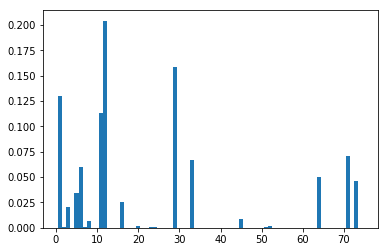

In [127]:
plt.bar(range(1,75),rf.feature_importances_,width=1,align="center")

In [128]:
abcd.sort(reverse=True)
abcd

[0.20412458898684088,
 0.15809982608879322,
 0.12989025556252826,
 0.11303081774837391,
 0.07091439520065777,
 0.06694360364429212,
 0.05965591457261982,
 0.05012120122737559,
 0.045641081646750487,
 0.03384431443082071,
 0.02501023768670353,
 0.02029868128777836,
 0.009083495643901231,
 0.00695388975812853,
 0.0018170071104717835,
 0.0016318023656663344,
 0.000737389202037802,
 0.00037444725096754696,
 0.00036641932379366385,
 0.0003536897544589975,
 0.00033819547487039535,
 0.00028253056023296605,
 0.00020852358106640496,
 0.0001900572960234581,
 5.921582749495762e-05,
 1.195722796096117e-05,
 1.0914253955405026e-05,
 5.547285434922725e-06,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [129]:
data.isnull().sum()

statuses_count                        0
followers_count                       0
friends_count                         0
favourites_count                      0
listed_count                          0
default_profile                       0
default_profile_image                 0
geo_enabled                           0
profile_use_background_image          0
profile_background_tile               0
utc_offset                            0
updated                               0
profile_link_color_red                0
profile_link_color_green              0
profile_link_color_blue               0
profile_background_color_red          0
profile_background_color_green        0
profile_background_color_blue         0
profile_sidebar_fill_color_red        0
profile_sidebar_fill_color_green      0
profile_sidebar_fill_color_blue       0
profile_sidebar_border_color_red      0
profile_sidebar_border_color_green    0
profile_sidebar_border_color_blue     0
profile_text_color_red                0
